<a href="https://colab.research.google.com/github/cotozelo/Ciencia_Dados_-_Diversos/blob/main/src/Finac/Predi%C3%A7%C3%A3oPre%C3%A7oA%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição

Estudo do uso de rede LSTM para previsão do Preço das Ações da APPLE Inc. Usando somente os 60 dias anteriores para previsão.



# imports

In [1]:
# biblioteca de preços do mercado financeiro.
!pip install yfinance --upgrade --no-cache-dir

In [2]:
import math
import yfinance as yf
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yf.pdr_override()
#definindo tamanho das figuras
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)

# Get preços

In [3]:
appl = web.get_data_yahoo('AAPL', start='2012-01-01')#, end='2019-12-17')
appl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...
2021-08-24,149.449997,150.860001,149.149994,149.619995,149.619995,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,148.360001,58991300
2021-08-26,148.350006,149.119995,147.509995,147.539993,147.539993,48597200


In [4]:
print('Tamanho do conjuto de dados', appl.shape)

Tamanho do conjuto de dados (2431, 6)


# Visualizando 

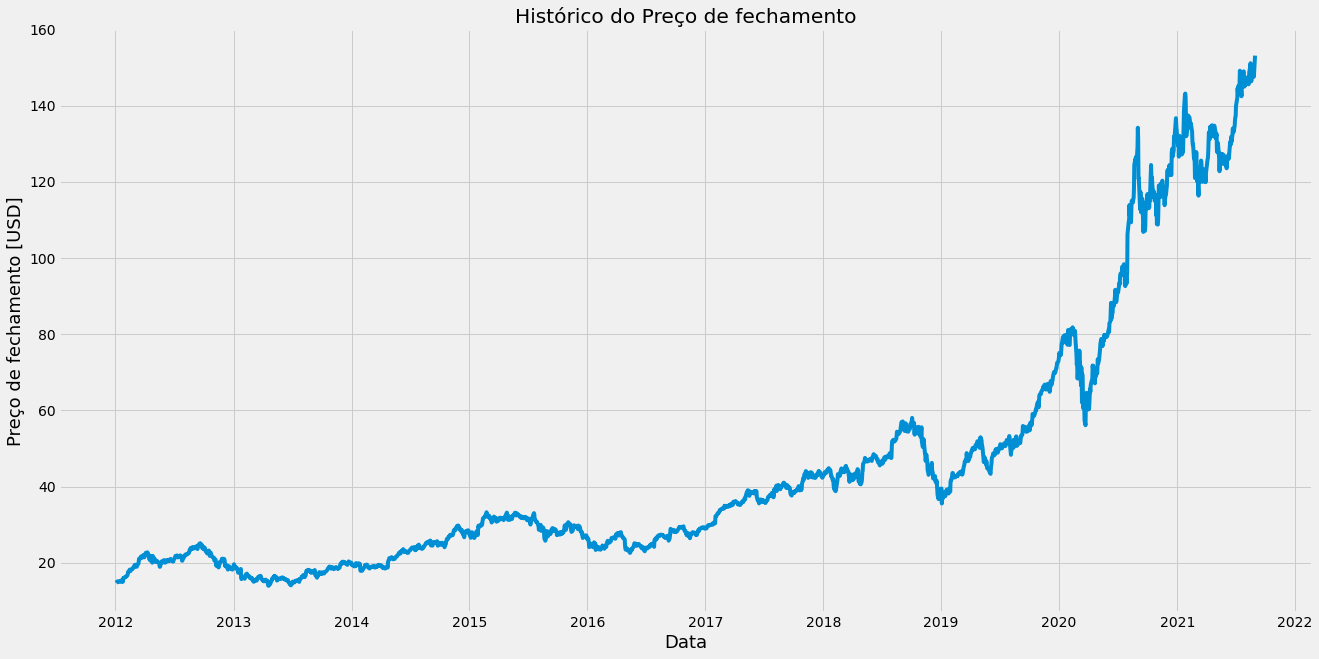

In [5]:
plt.figure()
plt.title('Histórico do Preço de fechamento')
plt.plot(appl['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de fechamento [USD]', fontsize=18)
plt.show()

# Tratando dados

In [6]:
#Filtrando coluna close
data = appl.filter(['Close'])
print(data.shape)
print(data.head())

(2431, 1)
                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786


In [7]:
#Convertendo para numpy o dataframe
dataset = data.values
dataset.shape

(2431, 1)

# Calculando quantidade Train e Test


In [8]:
total = len(dataset)
corte = int(total * 0.8)
print('corte ', corte, 'de', total)
print('X:', corte)
print('y:', total - corte)

corte  1944 de 2431
X: 1944
y: 487


# Normalizando dados

In [9]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(dataset[:corte])
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaler_train = scaler.transform(dataset)
scaler_train.shape

(2431, 1)

# Criando passo de 60 dias

In [11]:
passo = 60
print(scaler_train[0: passo, 0])
print(scaler_train[passo, 0])

[0.01677525 0.01856622 0.02228596 0.02582741 0.02528444 0.02650814
 0.02594896 0.0250089  0.02372846 0.02769133 0.0312652  0.03016305
 0.02412556 0.02988751 0.02421471 0.04548769 0.04384259 0.04599015
 0.05063372 0.05344579 0.05321078 0.05234367 0.05603909 0.05951568
 0.06345425 0.06981588 0.08317935 0.08338195 0.09082143 0.09638074
 0.08682617 0.09050536 0.09043243 0.10074882 0.09928197 0.1019968
 0.1068754  0.10959027 0.11741061 0.12310769 0.1247528  0.12532821
 0.11558723 0.11323704 0.11358553 0.12274305 0.12532011 0.13085515
 0.14390255 0.16130993 0.15805211 0.15806021 0.17064572 0.17458428
 0.17178026 0.16921943 0.16655321 0.17541084 0.18148887 0.18403351]
0.17774480420636363


In [12]:
X_ = []
y_ = []
passo = 60

for ii in range(passo, len(scaler_train)):
  X_.append(scaler_train[ii-60:ii, 0])
  y_.append(scaler_train[ii, 0])

print('X', len(X_))
print('y', len(y_))

X 2371
y 2371


# Separando Train e Test

In [13]:

print('\nTRAIN')
X_train = X_[0 : corte]
y_train = y_[0 : corte]
print('X_train', len(X_train))
print('y_train', len(y_train))

print('\nTEST')
X_test = X_[corte:]
y_test = y_[corte:]
print('X_test', len(X_test))
print('y_test', len(y_test))


TRAIN
X_train 1944
y_train 1944

TEST
X_test 427
y_test 427


# Reshape dos dados

In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1944, 60, 1)
(427, 60, 1)


# Criando modelo LSTM

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compliando modelo LSTM

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando modelo LSTM

In [18]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

1944/1944 [==============================] - 61s 30ms/step - loss: 0.0018


# Obtendo prectio do modelo LSTM

In [19]:
y_predict = model.predict(X_test)
y_predict.shape

(427, 1)

# Invertendo normalização

In [20]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_test_o = scaler.inverse_transform(y_test)
y_test_o.shape

(427, 1)

In [21]:
y_predict_o = scaler.inverse_transform(y_predict)
y_predict_o.shape

(427, 1)

# Erro da previsão (Root Mean Squared Error - RMSE)

In [22]:
rmse = np.sqrt(np.mean(y_predict_o - y_test_o) ** 2)
rmse

11.563254273747393

# Visualizando resultado

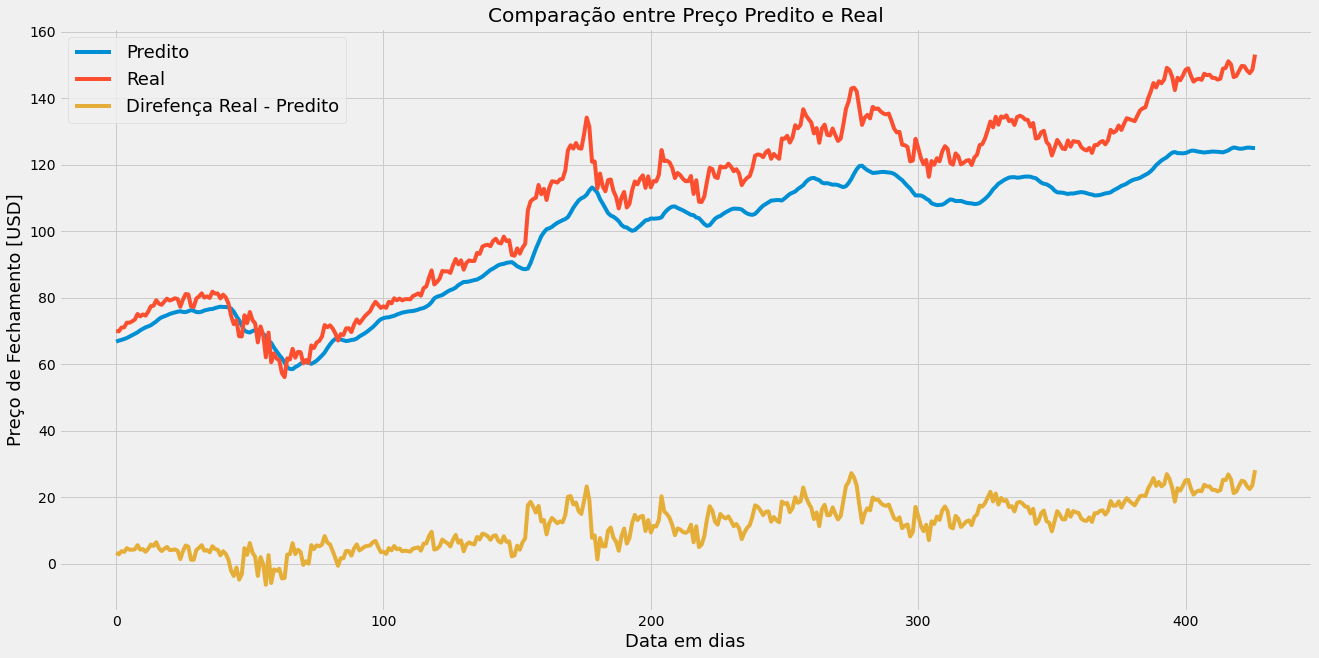

In [23]:
plt.figure()
plt.title('Comparação entre Preço Predito e Real')
plt.plot(y_predict_o, label='Predito')
plt.plot(y_test_o, label='Real')
plt.plot(y_test_o - y_predict_o, label='Direfença Real - Predito')
plt.legend(fontsize=18)
plt.xlabel('Data em dias', fontsize=18)
plt.ylabel('Preço de Fechamento [USD]', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


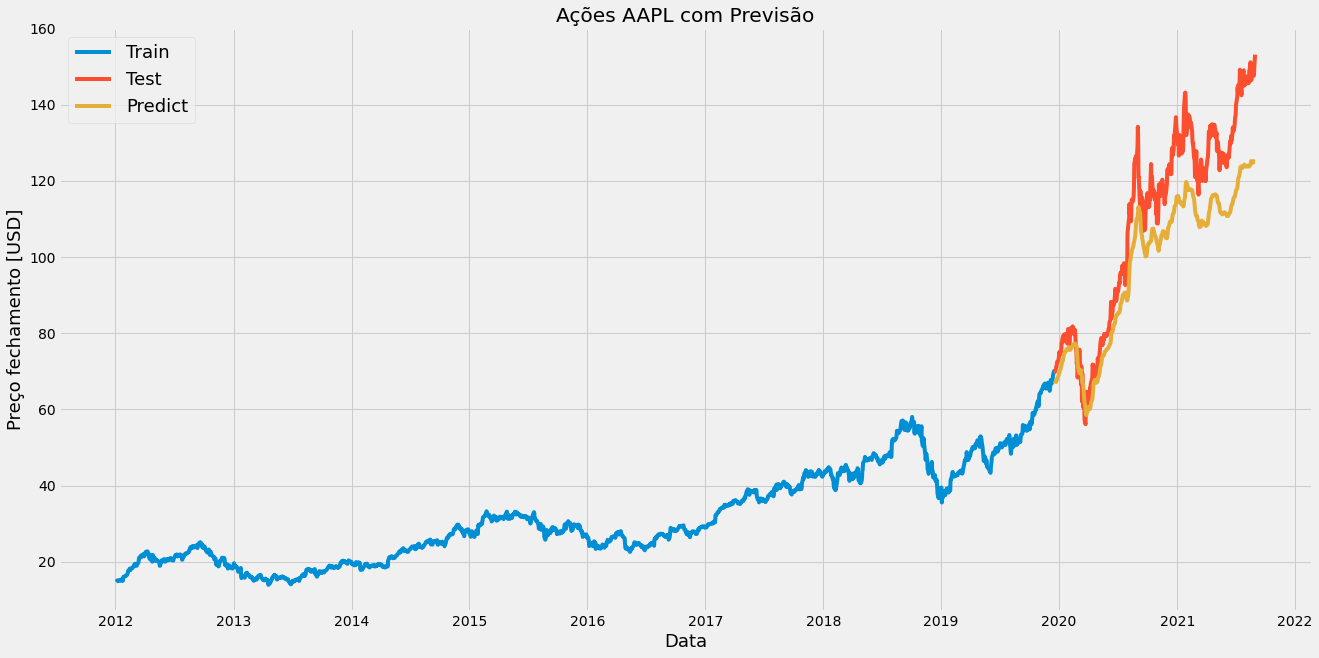

In [24]:
train = data[: total - y_test.shape[0]]
valid = data[total - y_test.shape[0] :]
valid['Predito'] = y_predict_o[:,0]

plt.figure()
plt.title('Ações AAPL com Previsão')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço fechamento [USD]', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predito']])
plt.legend(['Train', 'Test', 'Predict'], fontsize=18)
plt.show()